<a href="https://colab.research.google.com/github/agarwalprashant/All-Colab-Notebooks/blob/main/Session29_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform EDA on below insurance dataset
Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('/content/insurance_data.csv')

In [3]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


Missing values


*   Age - 5
*   region - 3


*   Age is normally(almost) distributed as skew value is very close to 0

*  After plotting the box plot, I don't see any outliers in the data
* Age column has less than 0.3 percentage data missing
* Median value in the age, is 38
* Shapiro Wilk test gives value which is very, very, very small almost equals to 0, which suggest that the age column is not normal this is a contradiction to the skew test that we did earlier.





Column Types



1.   Numerical - index,PatientID,age,bmi,bloodpressure,children,claim
2.   Categorical - gender, diabetic, smoker, region
3. Mixed -



In [5]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


# Univariate Analysis

<Axes: ylabel='Frequency'>

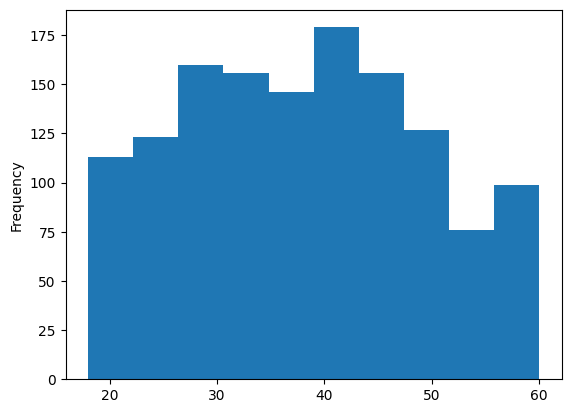

In [14]:
df['age'].plot(kind='hist',bins=10)


<Axes: ylabel='Density'>

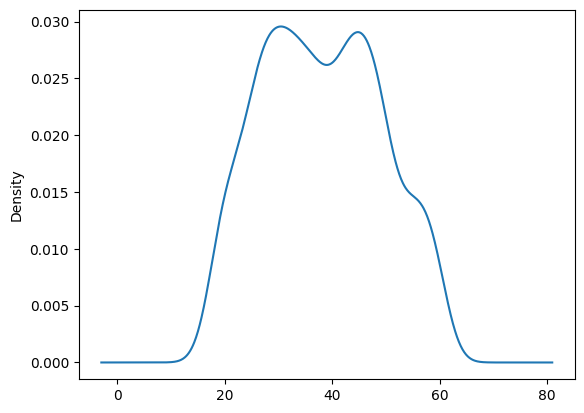

In [13]:
df['age'].plot(kind='kde')


In [24]:
df['age'].median()

38.0

In [16]:
# as the value is near 0 we can consider this to be normal distribution, if this was a very big positive value, then it would be right skewed, otherwise if it is negative, it will be left skewed

df['age'].skew()


np.float64(0.11361133741072633)

<Axes: >

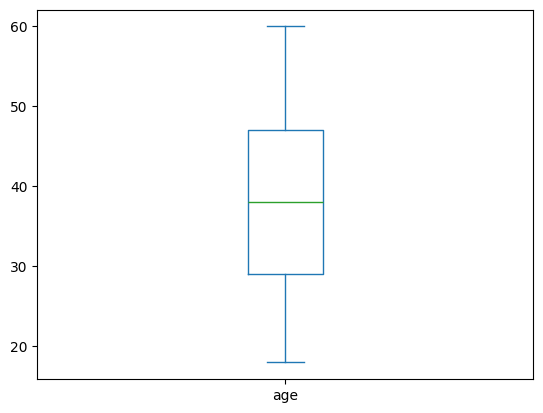

In [17]:
df['age'].plot(kind='box') # no ouliers


In [21]:
df[df['age'].isnull()]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45


In [23]:
df['age'].isnull().sum() / len(df['age'])


np.float64(0.0037313432835820895)

In [32]:
df['age'].mean()

np.float64(38.07865168539326)

In [36]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [37]:
df['age'].isnull().sum()

np.int64(0)

In [40]:
W, p_value = stats.shapiro(df['age'])
W, p_value

(np.float64(0.9733593968300187), np.float64(5.0641000044198105e-15))

In [41]:
5.0641000044198105e-15

5.0641000044198105e-15

In [31]:
df['age'].values

array([39., 24., nan, ..., 30., 37., 30.])

In [27]:
np.random.seed(42)
exam_scores = np.random.normal(70, 15, 100)

In [28]:
exam_scores

array([77.4507123 , 67.92603548, 79.71532807, 92.84544785, 66.48769938,
       66.48794565, 93.68819223, 81.51152094, 62.95788421, 78.13840065,
       63.04873461, 63.0140537 , 73.62943407, 41.30079633, 44.12623251,
       61.56568706, 54.80753319, 74.71370999, 56.37963887, 48.81544448,
       91.98473153, 66.61335549, 71.01292307, 48.62877721, 61.83425913,
       71.66383885, 52.73509634, 75.63547028, 60.99041965, 65.62459375,
       60.97440082, 97.78417277, 69.79754163, 54.13433607, 82.33817368,
       51.68734525, 73.13295393, 40.60494814, 50.07720927, 72.95291854,
       81.0769987 , 72.57052422, 68.26527576, 65.48344457, 47.82217014,
       59.20233687, 63.09041844, 85.85683339, 75.15427434, 43.55439767,
       74.86125954, 64.22376579, 59.84617   , 79.17514433, 85.46499284,
       83.96920179, 57.41173715, 65.36181436, 74.96895147, 84.63317691,
       62.81238643, 67.21511535, 53.40497539, 52.05690064, 82.18788734,
       90.34360043, 68.91984818, 85.05299347, 75.42454038, 60.32

### Fare


**Conclusions**

* No Missing Values in this column
* observation is that the median value is less than the mean value, which indicates that the data might be righ skewed
* The typical claim falls between approximately 5,000 and 17,000
that is 25% and 75% percentile data
* The median claim is around 9369.
* There are many unusually high claims (outliers) reaching up to about 60,000
* The data is right-skewed (like how wealth distribution tends to have a long tail) - most claims are clustered in the lower range, but some extremely high values exist
* also about that, if you want to about run any statistical test on this column, which assumes data to be normal distributed, you cannot run those test. You have to be cautious about it.


In [42]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [43]:
df['claim'].describe()

,claim
count,1340.000000
mean,13252.745642
std,12109.609288
min,1121.870000
25%,4719.685000
50%,9369.615000
75%,16604.305000
max,63770.430000


In [44]:
# find missing values
df['claim'].isnull().sum()

np.int64(0)

In [45]:
df['claim'].skew()

np.float64(1.5167468509489237)

<Axes: ylabel='Frequency'>

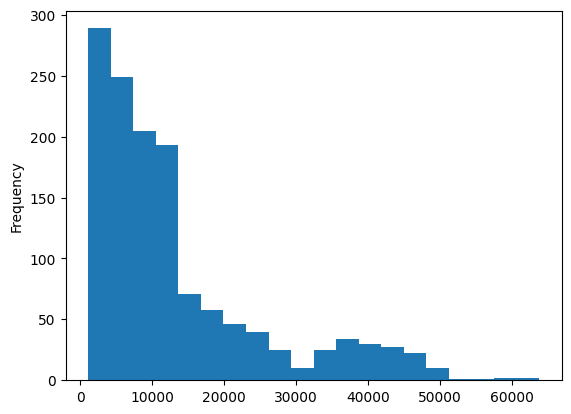

In [46]:
# Visualize Claim column
df['claim'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

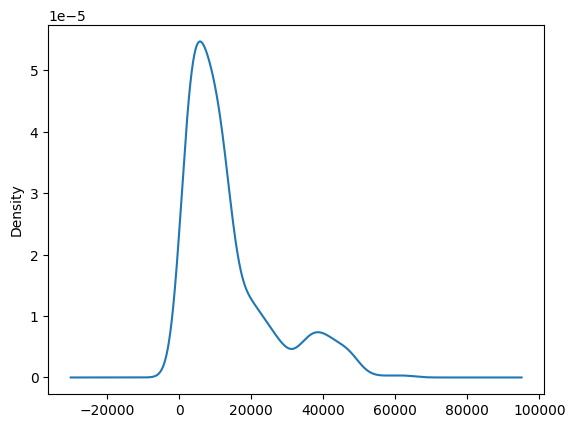

In [47]:
df['claim'].plot(kind='kde')


How do I interpret the fact that Q1 is nearby to the lower whisker and Q3 is very far from the higher whisker


That's an excellent observation! This pattern reveals important insights about your data distribution.

Think of this box plot like a crowd of people at a concert. The Q1 (25th percentile) being close to the lower whisker means the people at the back of the crowd (lower values) are standing fairly close together, with similar heights. There's not much variation among the smallest claims.

Meanwhile, Q3 (75th percentile) being very far from the upper whisker indicates that the people at the front of the crowd (higher values) are spread out over a much greater distance. This shows substantial variation among the larger claims.

This specific pattern tells us:

1. **Compressed lower range**: The data between the minimum (lower whisker) and Q1 is tightly packed, suggesting consistency among smaller claims. These might represent routine, predictable claims with little variation.

2. **Expanded upper range**: The wide gap between Q3 and the upper whisker (before we even consider outliers) shows much greater variation in the larger claims. These might represent more complex cases with variable factors influencing claim amounts.

3. **Right-skewed with "stretching"**: Not only is your distribution right-skewed, but the skewness increases as you move up the value range. This is like a rubber band that stretches more the further right you go.

This pattern is common in financial data where there might be standard protocols for handling smaller claims, while larger claims involve more variables and case-by-case assessment, leading to greater variation in the upper ranges.

<Axes: >

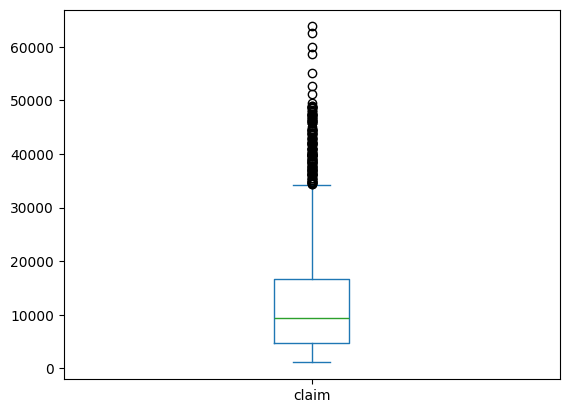

In [50]:
df['claim'].plot(kind='box') # lot of outliers


I can also see that the median the green line is also more closer to Q1 as opposed to Q3. How do I interpret this result?


Great observation! The median (green line) being closer to Q1 than to Q3 provides another important insight about your distribution.

Think of this like a school race where most children finish close to the starting line, while a smaller number of faster runners stretch far ahead. When the median is closer to Q1, it means the central tendency of your data leans toward the lower values.

This specifically tells us:

1. **Concentration in lower values**: The majority of your claims cluster in the lower range. If we split all claims into equal halves by count, the lower half is compressed into a smaller value range.

2. **Value dispersion in upper half**: The upper 50% of claims span a much wider range of values. This means there's more variation in claim amounts above the median.

3. **Right skew within the box itself**: This asymmetry within the box (not just in the whiskers or outliers) confirms a persistent right skew throughout the entire distribution.

This pattern is typical in insurance claim data where most claims might follow standard patterns with modest amounts, while a smaller subset involves increasingly complex situations with progressively higher amounts. It's like how most households have moderate utility bills, but a few have dramatically higher consumption.

Combined with your previous observation, we have a distribution that shows compression at the lower end, moderate expansion in the middle, and significant stretching in the upper ranges - an increasingly right-skewed distribution where variability grows with claim size.

In [54]:
df[df['claim'] > 50000]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43
